In [26]:
# Import numpy and pandas 

import numpy as np
import pandas as pd

In [27]:
''' I- Read the dataset file “Cancer.csv” (from github using the following command),'''

df  = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv")

In [28]:
# Preview file 

df.head(10)

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


In [29]:
# Print columns 

print(df.columns)

Index(['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Malignant_Cancer'],
      dtype='object')


In [30]:
# Creating the Feature Matrix for the dataset:

feature_cols = ['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses']


# use the above list to select the features from the original DataFrame

X = df[feature_cols]
X

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
145,3,1,1,1,2,1,2,1,1
146,9,7,7,5,5,10,7,8,3
147,10,8,8,4,10,10,8,1,1
148,1,1,1,1,2,1,3,1,1


In [31]:
# Select label from DF 
# Malignant is "1", bening is "0" 

y = df['Malignant_Cancer']

In [32]:
''' II- Use sklearn functions to split the dataset into testing and training sets '''

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [33]:
''' III- Use “Decision Tree Classifier” to predict Cancer based on the training/testing datasets built'''

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

# Defining decision tree classifier
my_DecisionTree = DecisionTreeClassifier(random_state=2)

# Fit model on the training data
my_DecisionTree.fit(X_train, y_train)

# Make prodections on testing data
y_predict = my_DecisionTree.predict(X_test)

# Calculating and reporting accuracy score
accuracy = accuracy_score(y_test, y_predict)

print("Accuracy: ", accuracy)

# Caulculate and print AUC 
auc_score = roc_auc_score(y_test, my_DecisionTree.predict_proba(X_test)[:, 1])

print("AUC: ", auc_score)

Accuracy:  0.8666666666666667
AUC:  0.8697478991596639


In [34]:
'''IV- Perform “Bagging” based on 29 “base decision tree classifiers”.'''

# 1. Make a bootstarp sample of the original “Training” Dataset (build in part(II)) with size of bootstarp_size = 0.8*(Size of the original dataset).

from sklearn.utils import resample

# Setting number of base classifiers 
num_classifiers = 29

# Setting size of bootstrap sample
bootstrap_size = int(0.8 * len(X_train))

# Initializing list to store base classifier predictions 
base_classifier_predict = np.zeros((len(X_test), num_classifiers))

# Performing boostrapping for loop
for i in range(num_classifiers):

    bootstrap_indices = np.random.choice(len(X_train), size=bootstrap_size, replace=True)
    X_bst = X_train.iloc[bootstrap_indices]
    y_bst = y_train.iloc[bootstrap_indices]
    
    # 2. Define and train a new base decision tree classifier on this dataset in each iteration:
    Base_DecisionTree = DecisionTreeClassifier(random_state=2)
    Base_DecisionTree.fit(X_bst, y_bst)
    
    # 3. Perform prediction “this base classifier” on the original “Testing” Dataset build in part(II), 
    # and save the prediction results for all testing samples.
    base_classifier_predict[:, i] = Base_DecisionTree.predict(X_test)
    
    # Perform majority voting to make the final decision
    final_bagging_predictions = np.round(np.mean(base_classifier_predict, axis=1))

    
# Calculate and report the Accuracy of your Bagging method.
bagging_accuracy = accuracy_score(y_test, final_bagging_predictions)
print("Bagging Accuracy:", bagging_accuracy)

# calculate and report the AUC of your Bagging method.
bagging_auc = roc_auc_score(y_test, np.mean(base_classifier_predict, axis=1))
print("Bagging AUC:", bagging_auc)

Bagging Accuracy: 0.8666666666666667
Bagging AUC: 0.9359243697478992


In [35]:
'''V- Use scikit-learn “Adaboost” classifier to predict Cancer based on the training/testing 
datasets'''

from sklearn.ensemble import AdaBoostClassifier

# Defining Adaboost classifier 
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)

# Train the AdaBoost classifier on the training data
my_AdaBoost.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_ada = my_AdaBoost.predict(X_test)

# Calculate accuracy
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Accuracy: ", ada_accuracy)

# Calculate AUC
y_prob_ada = my_AdaBoost.predict_proba(X_test)[:, 1]  # Probability of the positive class
ada_auc = roc_auc_score(y_test, y_prob_ada)
print("AdaBoost AUC: ", ada_auc)

AdaBoost Accuracy:  0.9555555555555556
AdaBoost AUC:  0.9611344537815125


In [36]:
'''VI-Repeat section V now with XGBoost.'''

from xgboost import XGBClassifier

# Define XGBoost classifier
my_XGBoost = XGBClassifier(n_estimators=29, random_state=2)

# Train the XGBoost classifier on the training data
my_XGBoost.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_xgb = my_XGBoost.predict(X_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy: ", xgb_accuracy)

# Calculate AUC
y_prob_xgb = my_XGBoost.predict_proba(X_test)[:, 1]  # Probability of the positive class
xgb_auc = roc_auc_score(y_test, y_prob_xgb)
print("XGBoost AUC: ", xgb_auc)

XGBoost Accuracy:  0.9555555555555556
XGBoost AUC:  0.963235294117647


In [37]:
'''VII- Use scikit-learn “Random Forest” classifier to predict Cancer based 
on the training/testing datasets that you built in part (II). 
Then, calculate and report the accuracy and AUC of your classifier.'''

from sklearn.ensemble import RandomForestClassifier

# Define RandomForest classifier
my_RandomForest = RandomForestClassifier(n_estimators=29, bootstrap=True, random_state=2)

# Train the RandomForest classifier on the training data
my_RandomForest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = my_RandomForest.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy: ", rf_accuracy)

# Calculate AUC
y_prob_rf = my_RandomForest.predict_proba(X_test)[:, 1]  # Probability of the positive class
rf_auc = roc_auc_score(y_test, y_prob_rf)
print("Random Forest AUC: ", rf_auc)

Random Forest Accuracy:  0.9555555555555556
Random Forest AUC:  0.9516806722689075


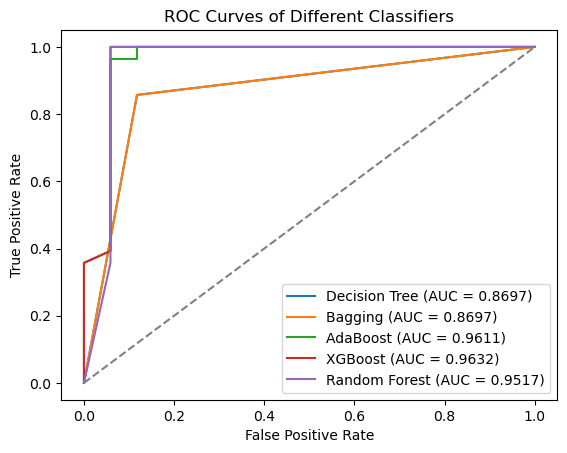

In [46]:
'''VIII- Plot the ROC curves for the algorithms'''

import matplotlib.pyplot as plt

# Define all five classifiers 
classifiers = [
    ("Decision Tree", my_DecisionTree),
    ("Bagging", final_bagging_predictions),
    ("AdaBoost", y_prob_ada),
    ("XGBoost", y_prob_xgb),
    ("Random Forest", y_prob_rf)
]

# Plot ROC curves
for name, classifier in classifiers:
    if isinstance(classifier, np.ndarray):
        pred_prob = classifier
    else:
        pred_prob = classifier.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Different Classifiers')
plt.legend(loc='lower right')
plt.show()